## Import Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import pylhe

Welcome to JupyROOT 6.20/04


## Define Mass Function

In [2]:
def invariant_mass(p1, p2):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu)+getattr(p2,mu))**2 for mu in ['e','px','py','pz']))
def transverse_mass(p1):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu))**2 for mu in ['e','pz']))

#### Note
 \begin{align}
 & p_\mu p^\mu = \frac{E^2}{c^2}-\vec{p}^2=m^2c^2 \\
 &\Rightarrow m^2=E^2-\vec{p}^2
 \end{align}
Transverse mass with $c=1$
 \begin{align}
 m_T^2 = m^2+p_x^2+p_y^2=E^2-p_z^2 \\
 \end{align}
In collider physics, we use another definition of transverse mass (and transverse energy). Because total energy is unknown, above definition cannot be used.
 \begin{align}
 M_T^2 &= (E_{T,1}+E_{T,2})^2-(\vec{p}_{T,1}+\vec{p}_{T,2})^2 \\
 &= E_{T,1}^2+E_{T,2}^2+2E_{T,1}E_{T,2}-\vec{p}_{T,1}^2-\vec{p}_{T,2}^2-2\vec{p}_{T,1}\cdot \vec{p}_{T,2} \\
 &= m_1^2+m_2^2+2\left(E_{T,1}E_{T,2}-\vec{p}_{T,1}\cdot \vec{p}_{T,2}\right)
 \end{align}
where $E_T$ is the transverse energy of each daughter
 \begin{align}
 E_T^2 = m^2+\vec{p}_T^2
 \end{align}
For massless daughters, where $m_1=m_2=0$, we obtain $E_T=p_T$ such that
 \begin{align}
 M_T^2 = 2E_{T,1}E_{T,2}(1-\cos{\phi})
 \end{align}

## Create Mass Lists and a Event List

In [16]:
# process_path_MZ_1500 = '/youwei_home/SVJ_py/Tutorial/s_channel0/Events/run_01/unweighted_events.lhe'
process_path_MZ_1500 = '/youwei_home/SVJ_py/Tutorial/LHE/0.lhe'
s_channel0_MZ_1500 = pylhe.readLHE(process_path_MZ_1500)

m, mT, event_list = [], [], []

for event in s_channel0_MZ_1500:
    m.append(invariant_mass(event.particles[-1],event.particles[-2]))
    mT.append(transverse_mass(event.particles[-3]))
    event_list.append(event)

m, mT = np.array(m), np.array(mT)

In [9]:
print(dir(event_list[0]))
print('-'*147)
print(dir(event_list[0].particles))
print('-'*147)
print(dir(event_list[0].particles.index))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'attributes', 'eventinfo', 'particles', 'weights']
---------------------------------------------------------------------------------------------------------------------------------------------------
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshoo

In [10]:
dir(event_list[0].particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [17]:
print(getattr(event_list[9999].particles[0],'e'))
print(getattr(event_list[0].particles[0],'e'), getattr(event_list[0].particles[-1],'pz'))

1624.1253321
3847.6427778 2366.6361861


#### Note
There are 10000 events [0-9999].
What does particles[0] mean? Ans: Following #=1 particle.

## Print Information for First Event

In [18]:
print('{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}'.format('#','id','mother1','mother2','e','px','py','pz','status'))

for i, element in enumerate(event_list[0].particles):
    print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))

     #         id      mother1     mother2        e           px          py          pz        status   
     1          2         0           0        3847.643     0.000       0.000      3847.643       -1     
     2         -2         0           0        145.547      -0.000      -0.000     -145.547       -1     
     3       5000001      1           2        3993.190     0.000       0.000      3702.096       2      
     4       4900101      3           3        1518.592    672.809     -264.379    1335.460       1      
     5      -4900101      3           3        2474.598    -672.809    264.379     2366.636       1      


In [7]:
print('{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}'.format('#','id','mother1','mother2','e','px','py','pz','status'))

for i, element in enumerate(event_list[0].particles):
    print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))

     #         id      mother1     mother2        e           px          py          pz        status   
     1         -2         0           0        509.648      -0.000      0.000      509.648        -1     
     2          2         0           0        1093.678     0.000       -0.000    -1093.678       -1     
     3       5000001      1           2        1603.325     0.000       0.000      -584.030       2      
     4       4900101      3           3        596.249     501.067     174.392     271.903        1      
     5      -4900101      3           3        1007.077    -501.067    -174.392    -855.934       1      


In [19]:
[i.event for i in event_list[0].particles]

In [20]:
[i.status for i in event_list[0].particles]  # particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 1.0, 1.0]

In [21]:
[i.mothers for i in event_list[0].particles]  # particle id for first event (Parton level)

[<bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7ffb08748908>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7ffb08748898>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7ffb08748f60>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7ffb08748fd0>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7ffb08748940>>]

In [22]:
print([i.mother2 for i in event_list[0].particles])
print([i.e for i in event_list[0].particles])
print([i.pz for i in event_list[0].particles])

[0.0, 0.0, 2.0, 3.0, 3.0]
[3847.6427778, 145.54680477, 3993.1895826, 1518.5916918, 2474.5978908]
[3847.6427778, -145.54680477, 3702.095973, 1335.459787, 2366.6361861]


In [11]:
print([i.mother2 for i in event_list[0].particles])
print([i.e for i in event_list[0].particles])
print([i.pz for i in event_list[0].particles])

[0.0, 0.0, 2.0, 3.0, 3.0]
[509.6475047, 1093.6778692, 1603.3253739, 596.24870773, 1007.0766661]
[509.6475047, -1093.6778692, -584.03036446, 271.90317723, -855.93354169]


## Plot

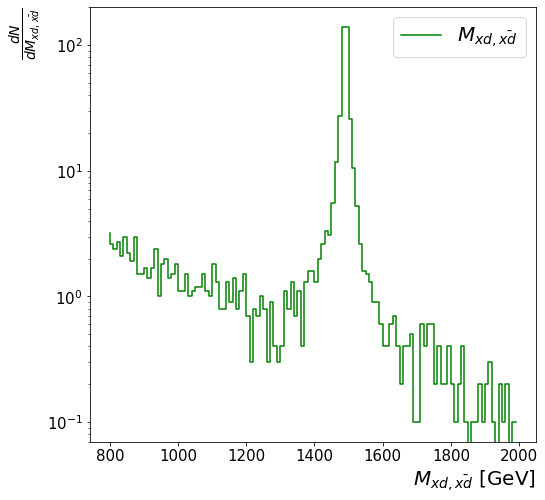

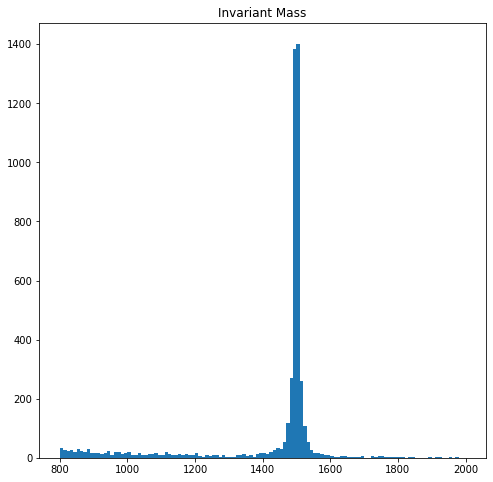

In [23]:
plt.figure(figsize=(8,8))  # plot size
 
bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# Not take log for scale of y axis.
plt.figure(figsize=(8,8))
plt.hist(m, bins=bin_size)
plt.title('Invariant Mass')
plt.show()

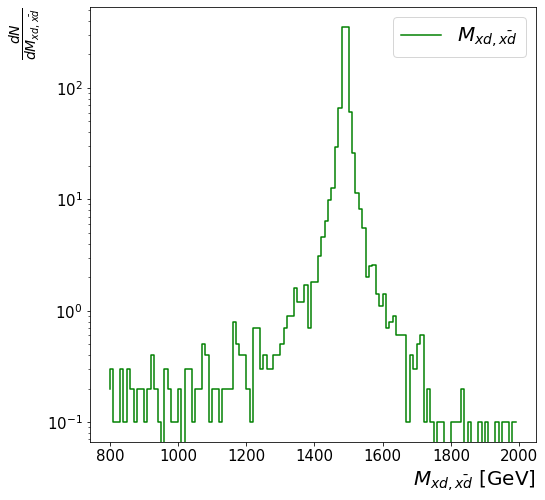

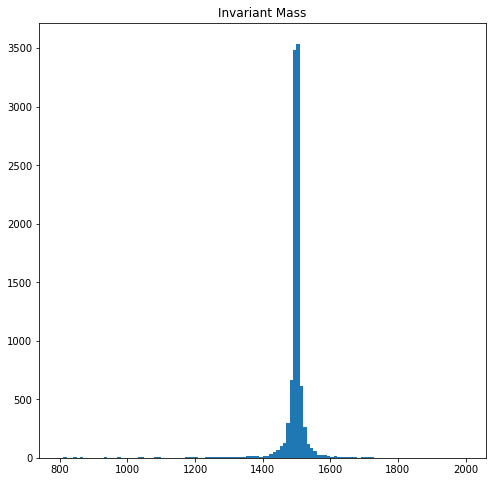

In [12]:
plt.figure(figsize=(8,8))  # plot size
 
bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# Not take log for scale of y axis.
plt.figure(figsize=(8,8))
plt.hist(m, bins=bin_size)
plt.title('Invariant Mass')
plt.show()

##### Problems
Why $\\bar{a}$? 
$\bar{a}$

In [13]:
print(bins)
print(bins[:-1])
print(hist)
print(hist.astype(np.float32)/10)

[ 800.  810.  820.  830.  840.  850.  860.  870.  880.  890.  900.  910.
  920.  930.  940.  950.  960.  970.  980.  990. 1000. 1010. 1020. 1030.
 1040. 1050. 1060. 1070. 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150.
 1160. 1170. 1180. 1190. 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270.
 1280. 1290. 1300. 1310. 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390.
 1400. 1410. 1420. 1430. 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510.
 1520. 1530. 1540. 1550. 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630.
 1640. 1650. 1660. 1670. 1680. 1690. 1700. 1710. 1720. 1730. 1740. 1750.
 1760. 1770. 1780. 1790. 1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870.
 1880. 1890. 1900. 1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990.
 2000.]
[ 800.  810.  820.  830.  840.  850.  860.  870.  880.  890.  900.  910.
  920.  930.  940.  950.  960.  970.  980.  990. 1000. 1010. 1020. 1030.
 1040. 1050. 1060. 1070. 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150.
 1160. 1170. 1180. 1190. 1200. 1210. 1220. 

In [14]:
print(sum(hist))
bin_size = np.linspace(100,3600,121)
hist, bins = np.histogram(m, bins=bin_size)
print(sum(hist))

9927
10000


In [ ]:
import rootnotes

### Why cannot import rootnotes?

In [ ]:
h = ROOT.TH1F('invmass', )